In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import MonthEnd

### Data cleaning and Data preprocess.

In [2]:
rf = pd.read_csv('risk-free_return.csv',parse_dates=[0], index_col=[0])
rf

,RF
DATE,
1926-07-31,0.0022
1926-08-31,0.0025
1926-09-30,0.0023
1926-10-31,0.0032
1926-11-30,0.0031
...,...
2018-03-31,0.0012
2018-04-30,0.0014
2018-05-31,0.0014


In [3]:
data = pd.read_csv('sp500data1.csv')
data

,PERMNO,date,TICKER,COMNAM,PRC,RET
0,10006,19650129,ACF,A C F INDUSTRIES INC,83.750,0.053459
1,10006,19650226,ACF,A C F INDUSTRIES INC,80.750,-0.025970
2,10006,19650331,ACF,A C F INDUSTRIES INC,84.000,0.040248
3,10006,19650430,ACF,A C F INDUSTRIES INC,91.125,0.084821
4,10006,19650528,ACF,A C F INDUSTRIES INC,86.250,-0.043621
...,...,...,...,...,...,...
551595,93429,20190830,CBOE,C B O E GLOBAL MARKETS INC,119.160,0.093404
551596,93429,20190930,CBOE,C B O E GLOBAL MARKETS INC,114.910,-0.035666
551597,93429,20191031,CBOE,C B O E GLOBAL MARKETS INC,115.150,0.002089
551598,93429,20191129,CBOE,C B O E GLOBAL MARKETS INC,118.900,0.035693


In [4]:
data1 = data.copy()

In [5]:
data1.drop(columns = ['COMNAM'],inplace=True)

In [6]:
data1['PRC']  = np.abs(data1['PRC'])
data1.dropna(inplace=True)
data1 = data1[~data1['RET'].isin(['A','B','C','D','E'])]
data1

,PERMNO,date,TICKER,PRC,RET
0,10006,19650129,ACF,83.750,0.053459
1,10006,19650226,ACF,80.750,-0.025970
2,10006,19650331,ACF,84.000,0.040248
3,10006,19650430,ACF,91.125,0.084821
4,10006,19650528,ACF,86.250,-0.043621
...,...,...,...,...,...
551595,93429,20190830,CBOE,119.160,0.093404
551596,93429,20190930,CBOE,114.910,-0.035666
551597,93429,20191031,CBOE,115.150,0.002089
551598,93429,20191129,CBOE,118.900,0.035693


In [7]:
data1['RET']=pd.to_numeric(data1['RET'])
data1.dtypes

PERMNO      int64
date        int64
TICKER     object
PRC       float64
RET       float64
dtype: object

In [8]:
data1['date']=pd.to_datetime(data1['date'],format='%Y%m%d')
data1

,PERMNO,date,TICKER,PRC,RET
0,10006,1965-01-29,ACF,83.750,0.053459
1,10006,1965-02-26,ACF,80.750,-0.025970
2,10006,1965-03-31,ACF,84.000,0.040248
3,10006,1965-04-30,ACF,91.125,0.084821
4,10006,1965-05-28,ACF,86.250,-0.043621
...,...,...,...,...,...
551595,93429,2019-08-30,CBOE,119.160,0.093404
551596,93429,2019-09-30,CBOE,114.910,-0.035666
551597,93429,2019-10-31,CBOE,115.150,0.002089
551598,93429,2019-11-29,CBOE,118.900,0.035693


### Get the component stocks in S&P 500.

In [9]:
neededstock = pd.read_sas('msf500.sas7bdat')
neededstock

,PERMNO,DATE
0,10006.0,1960-01-29
1,10006.0,1960-02-29
2,10006.0,1960-03-31
3,10006.0,1960-04-29
4,10006.0,1960-05-31
...,...,...
363571,93429.0,2019-08-30
363572,93429.0,2019-09-30
363573,93429.0,2019-10-31
363574,93429.0,2019-11-29


In [10]:
neededstock['PERMNO'] = neededstock['PERMNO'].astype('int')

In [11]:
neededstock.set_index(['PERMNO','DATE'],inplace=True)

In [12]:
neededstock

Empty DataFrame
Columns: []
Index: [(10006, 1960-01-29 00:00:00), (10006, 1960-02-29 00:00:00), (10006, 1960-03-31 00:00:00), (10006, 1960-04-29 00:00:00), (10006, 1960-05-31 00:00:00), (10006, 1960-06-30 00:00:00), (10006, 1960-07-29 00:00:00), (10006, 1960-08-31 00:00:00), (10006, 1960-09-30 00:00:00), (10006, 1960-10-31 00:00:00), (10006, 1960-11-30 00:00:00), (10006, 1960-12-30 00:00:00), (10006, 1961-01-31 00:00:00), (10006, 1961-02-28 00:00:00), (10006, 1961-03-30 00:00:00), (10006, 1961-04-28 00:00:00), (10006, 1961-05-31 00:00:00), (10006, 1961-06-30 00:00:00), (10006, 1961-07-31 00:00:00), (10006, 1961-08-31 00:00:00), (10006, 1961-09-29 00:00:00), (10006, 1961-10-31 00:00:00), (10006, 1961-11-30 00:00:00), (10006, 1961-12-29 00:00:00), (10006, 1962-01-31 00:00:00), (10006, 1962-02-28 00:00:00), (10006, 1962-03-30 00:00:00), (10006, 1962-04-30 00:00:00), (10006, 1962-05-31 00:00:00), (10006, 1962-06-29 00:00:00), (10006, 1962-07-31 00:00:00), (10006, 1962-08-31 00:00:00), (10006, 1962-09-28 00:00:00), (10006, 1962-10-31 00:00:00), (10006, 1962-11-30 00:00:00), (10006, 1962-12-31 00:00:00), (10006, 1963-01-31 00:00:00), (10006, 1963-02-28 00:00:00), (10006, 1963-03-29 00:00:00), (10006, 1963-04-30 00:00:00), (10006, 1963-05-31 00:00:00), (10006, 1963-06-28 00:00:00), (10006, 1963-07-31 00:00:00), (10006, 1963-08-30 00:00:00), (10006, 1963-09-30 00:00:00), (10006, 1963-10-31 00:00:00), (10006, 1963-11-29 00:00:00), (10006, 1963-12-31 00:00:00), (10006, 1964-01-31 00:00:00), (10006, 1964-02-28 00:00:00), (10006, 1964-03-31 00:00:00), (10006, 1964-04-30 00:00:00), (10006, 1964-05-28 00:00:00), (10006, 1964-06-30 00:00:00), (10006, 1964-07-31 00:00:00), (10006, 1964-08-31 00:00:00), (10006, 1964-09-30 00:00:00), (10006, 1964-10-30 00:00:00), (10006, 1964-11-30 00:00:00), (10006, 1964-11-30 00:00:00), (10006, 1964-12-31 00:00:00), (10006, 1965-01-29 00:00:00), (10006, 1965-02-26 00:00:00), (10006, 1965-02-26 00:00:00), (10006, 1965-03-31 00:00:00), (10006, 1965-04-30 00:00:00), (10006, 1965-05-28 00:00:00), (10006, 1965-05-28 00:00:00), (10006, 1965-06-30 00:00:00), (10006, 1965-07-30 00:00:00), (10006, 1965-08-31 00:00:00), (10006, 1965-08-31 00:00:00), (10006, 1965-09-30 00:00:00), (10006, 1965-10-29 00:00:00), (10006, 1965-11-30 00:00:00), (10006, 1965-12-31 00:00:00), (10006, 1966-01-31 00:00:00), (10006, 1966-02-28 00:00:00), (10006, 1966-03-31 00:00:00), (10006, 1966-04-29 00:00:00), (10006, 1966-05-31 00:00:00), (10006, 1966-06-30 00:00:00), (10006, 1966-07-29 00:00:00), (10006, 1966-08-31 00:00:00), (10006, 1966-09-30 00:00:00), (10006, 1966-10-31 00:00:00), (10006, 1966-11-30 00:00:00), (10006, 1966-12-30 00:00:00), (10006, 1967-01-31 00:00:00), (10006, 1967-02-28 00:00:00), (10006, 1967-03-31 00:00:00), (10006, 1967-04-28 00:00:00), (10006, 1967-05-31 00:00:00), (10006, 1967-06-30 00:00:00), (10006, 1967-07-31 00:00:00), (10006, 1967-08-31 00:00:00), (10006, 1967-09-29 00:00:00), (10006, 1967-10-31 00:00:00), (10006, 1967-11-30 00:00:00), (10006, 1967-12-29 00:00:00), ...]

[363576 rows x 0 columns]

In [13]:
data2 = data1.set_index(['PERMNO','date'])
data2

TICKER      PRC       RET
PERMNO date                                
10006  1965-01-29    ACF   83.750  0.053459
       1965-02-26    ACF   80.750 -0.025970
       1965-03-31    ACF   84.000  0.040248
       1965-04-30    ACF   91.125  0.084821
       1965-05-28    ACF   86.250 -0.043621
...                  ...      ...       ...
93429  2019-08-30   CBOE  119.160  0.093404
       2019-09-30   CBOE  114.910 -0.035666
       2019-10-31   CBOE  115.150  0.002089
       2019-11-29   CBOE  118.900  0.035693
       2019-12-31   CBOE  120.000  0.009251

[546111 rows x 3 columns]

In [14]:
data2 = data2.loc[data2.index.isin(neededstock.index)]
data2

TICKER      PRC       RET
PERMNO date                                
10006  1965-01-29    ACF   83.750  0.053459
       1965-02-26    ACF   80.750 -0.025970
       1965-03-31    ACF   84.000  0.040248
       1965-04-30    ACF   91.125  0.084821
       1965-05-28    ACF   86.250 -0.043621
...                  ...      ...       ...
93429  2019-08-30   CBOE  119.160  0.093404
       2019-09-30   CBOE  114.910 -0.035666
       2019-10-31   CBOE  115.150  0.002089
       2019-11-29   CBOE  118.900  0.035693
       2019-12-31   CBOE  120.000  0.009251

[329976 rows x 3 columns]

In [15]:
data3 = data2.dropna()
data3

TICKER      PRC       RET
PERMNO date                                
10006  1965-01-29    ACF   83.750  0.053459
       1965-02-26    ACF   80.750 -0.025970
       1965-03-31    ACF   84.000  0.040248
       1965-04-30    ACF   91.125  0.084821
       1965-05-28    ACF   86.250 -0.043621
...                  ...      ...       ...
93429  2019-08-30   CBOE  119.160  0.093404
       2019-09-30   CBOE  114.910 -0.035666
       2019-10-31   CBOE  115.150  0.002089
       2019-11-29   CBOE  118.900  0.035693
       2019-12-31   CBOE  120.000  0.009251

[329976 rows x 3 columns]

In [16]:
data3.reset_index('PERMNO',inplace=True)
data3.index = data3.index.map(lambda x: 100*x.year + x.month)
data3.index = pd.to_datetime(data3.index,format='%Y%m')+MonthEnd(1)
data3['RF'] = rf['RF']
data3['XRET'] = data3['RET']-data3['RF']
data3

,PERMNO,TICKER,PRC,RET,RF,XRET
date,,,,,,
1965-01-31,10006,ACF,83.750,0.053459,0.0028,0.050659
1965-02-28,10006,ACF,80.750,-0.025970,0.0030,-0.028970
1965-03-31,10006,ACF,84.000,0.040248,0.0036,0.036648
1965-04-30,10006,ACF,91.125,0.084821,0.0031,0.081721
1965-05-31,10006,ACF,86.250,-0.043621,0.0031,-0.046721
...,...,...,...,...,...,...
2019-08-31,93429,CBOE,119.160,0.093404,NaN,NaN
2019-09-30,93429,CBOE,114.910,-0.035666,NaN,NaN
2019-10-31,93429,CBOE,115.150,0.002089,NaN,NaN


In [17]:
data3.reset_index(inplace=True)
data3.set_index(['PERMNO','date'],inplace=True)

In [18]:
data3['LagRet']=data3['XRET'].groupby('PERMNO').shift(1)
data3.dropna(inplace=True)
data3

TICKER      PRC       RET      RF      XRET    LagRet
PERMNO date                                                            
10006  1965-02-28    ACF   80.750 -0.025970  0.0030 -0.028970  0.050659
       1965-03-31    ACF   84.000  0.040248  0.0036  0.036648 -0.028970
       1965-04-30    ACF   91.125  0.084821  0.0031  0.081721  0.036648
       1965-05-31    ACF   86.250 -0.043621  0.0031 -0.046721  0.081721
       1965-06-30    ACF   77.250 -0.104348  0.0035 -0.107848 -0.046721
...                  ...      ...       ...     ...       ...       ...
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328

[319711 rows x 6 columns]

In [19]:
data3['MA6m'] = data3['LagRet'].groupby(level='PERMNO',group_keys=False).rolling(6).mean()
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1965-02-28    ACF   80.750 -0.025970  0.0030 -0.028970  0.050659   
       1965-03-31    ACF   84.000  0.040248  0.0036  0.036648 -0.028970   
       1965-04-30    ACF   91.125  0.084821  0.0031  0.081721  0.036648   
       1965-05-31    ACF   86.250 -0.043621  0.0031 -0.046721  0.081721   
       1965-06-30    ACF   77.250 -0.104348  0.0035 -0.107848 -0.046721   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m  
PERMNO date                  
10006  1965-02-28       NaN  
       1965-03-31       NaN  
       1965-04-30       NaN  
       1965-05-31       NaN  
       1965-06-30       NaN  
...                     ...  
93429  2018-03-31  0.021199  
       2018-04-30  0.013526  
       2018-05-31 -0.005658  
       2018-06-30 -0.035412  
       2018-07-31 -0.025941  

[319711 rows x 7 columns]

In [20]:
data3['MA1y'] = data3['LagRet'].groupby(level='PERMNO',group_keys=False).rolling(12).mean()
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1965-02-28    ACF   80.750 -0.025970  0.0030 -0.028970  0.050659   
       1965-03-31    ACF   84.000  0.040248  0.0036  0.036648 -0.028970   
       1965-04-30    ACF   91.125  0.084821  0.0031  0.081721  0.036648   
       1965-05-31    ACF   86.250 -0.043621  0.0031 -0.046721  0.081721   
       1965-06-30    ACF   77.250 -0.104348  0.0035 -0.107848 -0.046721   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  
PERMNO date                            
10006  1965-02-28       NaN       NaN  
       1965-03-31       NaN       NaN  
       1965-04-30       NaN       NaN  
       1965-05-31       NaN       NaN  
       1965-06-30       NaN       NaN  
...                     ...       ...  
93429  2018-03-31  0.021199  0.032977  
       2018-04-30  0.013526  0.031166  
       2018-05-31 -0.005658  0.024368  
       2018-06-30 -0.035412  0.013059  
       2018-07-31 -0.025941  0.013700  

[319711 rows x 8 columns]

In [21]:
data3.dropna(subset=['MA1y'], inplace=True)
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1966-01-31    ACF   51.500  0.089947  0.0038  0.086147  0.073623   
       1966-02-28    ACF   50.000 -0.020388  0.0035 -0.023888  0.086147   
       1966-03-31    ACF   47.625 -0.047500  0.0038 -0.051300 -0.023888   
       1966-04-30    ACF   47.750  0.002625  0.0034 -0.000775 -0.051300   
       1966-05-31    ACF   47.500  0.006283  0.0041  0.002183 -0.000775   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  
PERMNO date                            
10006  1966-01-31  0.035580  0.016581  
       1966-02-28  0.048836  0.019538  
       1966-03-31  0.035469  0.019961  
       1966-04-30  0.029474  0.012632  
       1966-05-31  0.011802  0.005758  
...                     ...       ...  
93429  2018-03-31  0.021199  0.032977  
       2018-04-30  0.013526  0.031166  
       2018-05-31 -0.005658  0.024368  
       2018-06-30 -0.035412  0.013059  
       2018-07-31 -0.025941  0.013700  

[301427 rows x 8 columns]

### Set the signal of momentum.

In [22]:
data3['signal'] = 0
data3.loc[(data3['MA1y']<data3['MA6m']),'signal'] = 1
data3.loc[(data3['MA1y']>data3['MA6m']),'signal'] = -1
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1966-01-31    ACF   51.500  0.089947  0.0038  0.086147  0.073623   
       1966-02-28    ACF   50.000 -0.020388  0.0035 -0.023888  0.086147   
       1966-03-31    ACF   47.625 -0.047500  0.0038 -0.051300 -0.023888   
       1966-04-30    ACF   47.750  0.002625  0.0034 -0.000775 -0.051300   
       1966-05-31    ACF   47.500  0.006283  0.0041  0.002183 -0.000775   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  signal  
PERMNO date                                    
10006  1966-01-31  0.035580  0.016581       1  
       1966-02-28  0.048836  0.019538       1  
       1966-03-31  0.035469  0.019961       1  
       1966-04-30  0.029474  0.012632       1  
       1966-05-31  0.011802  0.005758       1  
...                     ...       ...     ...  
93429  2018-03-31  0.021199  0.032977      -1  
       2018-04-30  0.013526  0.031166      -1  
       2018-05-31 -0.005658  0.024368      -1  
       2018-06-30 -0.035412  0.013059      -1  
       2018-07-31 -0.025941  0.013700      -1  

[301427 rows x 9 columns]

### Apply momentum strategy.

In [23]:
data3['portret']=data3['XRET']*data3['signal']
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1966-01-31    ACF   51.500  0.089947  0.0038  0.086147  0.073623   
       1966-02-28    ACF   50.000 -0.020388  0.0035 -0.023888  0.086147   
       1966-03-31    ACF   47.625 -0.047500  0.0038 -0.051300 -0.023888   
       1966-04-30    ACF   47.750  0.002625  0.0034 -0.000775 -0.051300   
       1966-05-31    ACF   47.500  0.006283  0.0041  0.002183 -0.000775   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  signal   portret  
PERMNO date                                              
10006  1966-01-31  0.035580  0.016581       1  0.086147  
       1966-02-28  0.048836  0.019538       1 -0.023888  
       1966-03-31  0.035469  0.019961       1 -0.051300  
       1966-04-30  0.029474  0.012632       1 -0.000775  
       1966-05-31  0.011802  0.005758       1  0.002183  
...                     ...       ...     ...       ...  
93429  2018-03-31  0.021199  0.032977      -1 -0.019870  
       2018-04-30  0.013526  0.031166      -1  0.065554  
       2018-05-31 -0.005658  0.024368      -1  0.085217  
       2018-06-30 -0.035412  0.013059      -1 -0.065328  
       2018-07-31 -0.025941  0.013700      -1  0.068286  

[301427 rows x 10 columns]

In [24]:
data3['portret+1']=data3['portret']+1
data3

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1966-01-31    ACF   51.500  0.089947  0.0038  0.086147  0.073623   
       1966-02-28    ACF   50.000 -0.020388  0.0035 -0.023888  0.086147   
       1966-03-31    ACF   47.625 -0.047500  0.0038 -0.051300 -0.023888   
       1966-04-30    ACF   47.750  0.002625  0.0034 -0.000775 -0.051300   
       1966-05-31    ACF   47.500  0.006283  0.0041  0.002183 -0.000775   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  signal   portret  portret+1  
PERMNO date                                                         
10006  1966-01-31  0.035580  0.016581       1  0.086147   1.086147  
       1966-02-28  0.048836  0.019538       1 -0.023888   0.976112  
       1966-03-31  0.035469  0.019961       1 -0.051300   0.948700  
       1966-04-30  0.029474  0.012632       1 -0.000775   0.999225  
       1966-05-31  0.011802  0.005758       1  0.002183   1.002183  
...                     ...       ...     ...       ...        ...  
93429  2018-03-31  0.021199  0.032977      -1 -0.019870   0.980130  
       2018-04-30  0.013526  0.031166      -1  0.065554   1.065554  
       2018-05-31 -0.005658  0.024368      -1  0.085217   1.085217  
       2018-06-30 -0.035412  0.013059      -1 -0.065328   0.934672  
       2018-07-31 -0.025941  0.013700      -1  0.068286   1.068286  

[301427 rows x 11 columns]

In [25]:
data4 = data3.copy()

In [26]:
data4['cumret'] = data4['portret+1'].groupby('PERMNO').cumprod()
data4

TICKER      PRC       RET      RF      XRET    LagRet  \
PERMNO date                                                               
10006  1966-01-31    ACF   51.500  0.089947  0.0038  0.086147  0.073623   
       1966-02-28    ACF   50.000 -0.020388  0.0035 -0.023888  0.086147   
       1966-03-31    ACF   47.625 -0.047500  0.0038 -0.051300 -0.023888   
       1966-04-30    ACF   47.750  0.002625  0.0034 -0.000775 -0.051300   
       1966-05-31    ACF   47.500  0.006283  0.0041  0.002183 -0.000775   
...                  ...      ...       ...     ...       ...       ...   
93429  2018-03-31   CBOE  114.100  0.021070  0.0012  0.019870 -0.167630   
       2018-04-30   CBOE  106.780 -0.064154  0.0014 -0.065554  0.019870   
       2018-05-31   CBOE   97.560 -0.083817  0.0014 -0.085217 -0.065554   
       2018-06-30   CBOE  104.070  0.066728  0.0014  0.065328 -0.085217   
       2018-07-31   CBOE   97.130 -0.066686  0.0016 -0.068286  0.065328   

                       MA6m      MA1y  signal   portret  portret+1    cumret  
PERMNO date                                                                   
10006  1966-01-31  0.035580  0.016581       1  0.086147   1.086147  1.086147  
       1966-02-28  0.048836  0.019538       1 -0.023888   0.976112  1.060201  
       1966-03-31  0.035469  0.019961       1 -0.051300   0.948700  1.005813  
       1966-04-30  0.029474  0.012632       1 -0.000775   0.999225  1.005033  
       1966-05-31  0.011802  0.005758       1  0.002183   1.002183  1.007227  
...                     ...       ...     ...       ...        ...       ...  
93429  2018-03-31  0.021199  0.032977      -1 -0.019870   0.980130  0.980130  
       2018-04-30  0.013526  0.031166      -1  0.065554   1.065554  1.044381  
       2018-05-31 -0.005658  0.024368      -1  0.085217   1.085217  1.133380  
       2018-06-30 -0.035412  0.013059      -1 -0.065328   0.934672  1.059339  
       2018-07-31 -0.025941  0.013700      -1  0.068286   1.068286  1.131677  

[301427 rows x 12 columns]

In [27]:
data5 = data4.reset_index('date')
data5

,date,TICKER,PRC,RET,RF,XRET,LagRet,MA6m,MA1y,signal,portret,portret+1,cumret
PERMNO,,,,,,,,,,,,,
10006,1966-01-31,ACF,51.500,0.089947,0.0038,0.086147,0.073623,0.035580,0.016581,1,0.086147,1.086147,1.086147
10006,1966-02-28,ACF,50.000,-0.020388,0.0035,-0.023888,0.086147,0.048836,0.019538,1,-0.023888,0.976112,1.060201
10006,1966-03-31,ACF,47.625,-0.047500,0.0038,-0.051300,-0.023888,0.035469,0.019961,1,-0.051300,0.948700,1.005813
10006,1966-04-30,ACF,47.750,0.002625,0.0034,-0.000775,-0.051300,0.029474,0.012632,1,-0.000775,0.999225,1.005033
10006,1966-05-31,ACF,47.500,0.006283,0.0041,0.002183,-0.000775,0.011802,0.005758,1,0.002183,1.002183,1.007227
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93429,2018-03-31,CBOE,114.100,0.021070,0.0012,0.019870,-0.167630,0.021199,0.032977,-1,-0.019870,0.980130,0.980130
93429,2018-04-30,CBOE,106.780,-0.064154,0.0014,-0.065554,0.019870,0.013526,0.031166,-1,0.065554,1.065554,1.044381
93429,2018-05-31,CBOE,97.560,-0.083817,0.0014,-0.085217,-0.065554,-0.005658,0.024368,-1,0.085217,1.085217,1.133380


In [28]:
def quintiles(inser):
    outser = pd.qcut(inser, q=5, labels=range(1,6))
    return outser

### Choose stocks based on the performance of stocks in momentum strategy. Use the average monthly return or the Sharpe ratio as indicator of performance. Use the price's std or the return's std as indicator of stock quality.

In [29]:
def getMomListbypp(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE1']==1)&(momentum1['QUINTILE3']<=4)]
    list1 = momentum1res.index.tolist()
    return list1

In [30]:
def getMomListbypr(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE1']==1)&(momentum1['QUINTILE4']<=4)]
    list1 = momentum1res.index.tolist()
    return list1

In [31]:
def getMomListbysp(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE2']==1)&(momentum1['QUINTILE3']<=4)]
    list1 = momentum1res.index.tolist()
    return list1

In [32]:
def getMomListbysr(startdate,enddate):
    data_need = data5.loc[(data5['date']<=enddate) & (data5['date']>startdate),['PRC','RET','portret']]
    momentum1 = pd.DataFrame(data_need['portret'].groupby('PERMNO').mean())
    momentum1['sharperatio'] = data_need['portret'].groupby('PERMNO').mean()/data_need['portret'].groupby('PERMNO').std()
    momentum1['prcstd'] = data_need['PRC'].groupby('PERMNO').std()
    momentum1['retstd'] = data_need['RET'].groupby('PERMNO').std()
    momentum1['QUINTILE1'] = quintiles(momentum1['portret'])
    momentum1['QUINTILE2'] = quintiles(momentum1['sharperatio'])
    momentum1['QUINTILE3'] = quintiles(momentum1['prcstd'])
    momentum1['QUINTILE4'] = quintiles(momentum1['retstd'])
    momentum1res = momentum1.loc[(momentum1['QUINTILE2']==1)&(momentum1['QUINTILE4']<=4)]
    list1 = momentum1res.index.tolist()
    return list1

### Use the stocks got from the above to implement reversal strategy. Get the portfolio return and the minimum number of the stocks we invest each month during those years.

In [33]:
def getReversalPortRet(stocklist,startdate,enddate):
    reversal_data1 = data3.loc[stocklist]
    reversal_data11 = reversal_data1.reset_index('PERMNO')
    reversal_data11 = reversal_data11.loc[(reversal_data11.index<=enddate) & (reversal_data11.index>startdate)]
    reversalmean1 = reversal_data11['MA1y'].groupby('date').mean()
    reversalmean1 = pd.DataFrame(reversalmean1)
    reversal_data11['AvgMA1y'] = reversalmean1
    reversal_data11['diff'] = reversal_data11['LagRet']-reversal_data11['AvgMA1y']
    reversal_data11 = reversal_data11.reset_index()
    reversal_data11 = reversal_data11.set_index(['date','PERMNO'])
    reversal_data11 = reversal_data11.sort_index()
    posisum = reversal_data11.loc[(reversal_data11['diff']>0)].groupby('date').sum()['diff']
    posisum = pd.DataFrame(posisum)
    negsum = reversal_data11.loc[(reversal_data11['diff']<=0)].groupby('date').sum()['diff']
    negsum = pd.DataFrame(negsum)
    reversal_data11 = reversal_data11.reset_index('PERMNO')
    posiweight = reversal_data11.loc[(reversal_data11['diff']<=0),'diff']/negsum['diff']
    negweight = (-1)*reversal_data11.loc[(reversal_data11['diff']>0),'diff']/posisum['diff']
    posipermno=reversal_data11.loc[(reversal_data11['diff']<=0),'PERMNO']
    posipermno=pd.DataFrame(posipermno)
    posipermno=posipermno.reset_index()
    negpermno=reversal_data11.loc[(reversal_data11['diff']>0),'PERMNO']
    negpermno=pd.DataFrame(negpermno)
    negpermno=negpermno.reset_index()
    reversal_data11 = reversal_data11.reset_index()
    posiweight = pd.DataFrame(posiweight)
    posiweight = posiweight.reset_index()
    posiweight['PERMNO']=posipermno['PERMNO']
    posiweight=posiweight.set_index(['date','PERMNO'])
    negweight = pd.DataFrame(negweight)
    negweight = negweight.reset_index()
    negweight['PERMNO']=negpermno['PERMNO']
    negweight=negweight.set_index(['date','PERMNO'])
    reversal_data11 = reversal_data11.set_index(['date','PERMNO'])
    reversal_data11['weight'] = posiweight['diff']
    reversal_data11['negweight'] = negweight['diff']
    reversal_data11['weight']=reversal_data11['weight'].fillna(reversal_data11['negweight'])
    reversal_data11.drop('negweight',axis=1,inplace=True)
    reversal_data11['act_ret']=reversal_data11['XRET']*reversal_data11['weight']
    port_ret=reversal_data11['act_ret'].groupby('date').sum()
    port_ret=pd.DataFrame(port_ret)
    port_ret.index = port_ret.index.map(lambda x: 100*x.year + x.month)
    port_ret.index = pd.to_datetime(port_ret.index,format='%Y%m')+MonthEnd(1)
    a = reversal_data11.reset_index()
    a = a.loc[(a['weight']!=0),['date','weight']]
    num_stocks = a.groupby('date')['weight'].count().min()
    return port_ret,num_stocks

In [34]:
# Get the Momentum List by portfolio return as momentum performance and price std of stocks as stock quality selection.

list1pp = getMomListbypp('1965-01-01','1970-12-31')
list2pp = getMomListbypp('1975-01-01','1980-12-31')
list3pp = getMomListbypp('1985-01-01','1990-12-31')
list4pp = getMomListbypp('1995-01-01','2000-12-31')
list5pp = getMomListbypp('2005-01-01','2010-12-31')
[port_ret1pp,num1pp] = getReversalPortRet(list1pp,'1971-01-01','1980-12-31')
[port_ret2pp,num2pp] = getReversalPortRet(list2pp,'1981-01-01','1990-12-31')
[port_ret3pp,num3pp] = getReversalPortRet(list3pp,'1991-01-01','2000-12-31')
[port_ret4pp,num4pp] = getReversalPortRet(list4pp,'2001-01-01','2010-12-31')
[port_ret5pp,num5pp]= getReversalPortRet(list5pp,'2011-01-01','2018-12-31')
total_respp = pd.concat([port_ret1pp,port_ret2pp,port_ret3pp,port_ret4pp,port_ret5pp],axis=0)
minnumstockspp = np.array([num1pp,num2pp,num3pp,num4pp,num5pp])
print(minnumstockspp)

[46 29 46 39 58]


#### The minimum number stocks we invest each month for each 10-year period are above.

In [35]:
# Get the Momentum List by portfolio return as momentum performance and return std of stocks as stock quality selection.

list1pr = getMomListbypr('1965-01-01','1970-12-31')
list2pr = getMomListbypr('1975-01-01','1980-12-31')
list3pr = getMomListbypr('1985-01-01','1990-12-31')
list4pr = getMomListbypr('1995-01-01','2000-12-31')
list5pr = getMomListbypr('2005-01-01','2010-12-31')
[port_ret1pr,num1pr] = getReversalPortRet(list1pr,'1971-01-01','1980-12-31')
[port_ret2pr,num2pr] = getReversalPortRet(list2pr,'1981-01-01','1990-12-31')
[port_ret3pr,num3pr] = getReversalPortRet(list3pr,'1991-01-01','2000-12-31')
[port_ret4pr,num4pr] = getReversalPortRet(list4pr,'2001-01-01','2010-12-31')
[port_ret5pr,num5pr] = getReversalPortRet(list5pr,'2011-01-01','2018-12-31')
total_respr = pd.concat([port_ret1pr,port_ret2pr,port_ret3pr,port_ret4pr,port_ret5pr],axis=0)
minnumstockspr = np.array([num1pr,num2pr,num3pr,num4pr,num5pr])
print(minnumstockspr)

[47 29 45 36 60]


In [36]:
# Get the Momentum List by portfolio sharpe ratio as momentum performance and price std of stocks as stock quality selection.

list1sp = getMomListbysp('1965-01-01','1970-12-31')
list2sp = getMomListbysp('1975-01-01','1980-12-31')
list3sp = getMomListbysp('1985-01-01','1990-12-31')
list4sp = getMomListbysp('1995-01-01','2000-12-31')
list5sp = getMomListbysp('2005-01-01','2010-12-31')
[port_ret1sp,num1sp] = getReversalPortRet(list1sp,'1971-01-01','1980-12-31')
[port_ret2sp,num2sp] = getReversalPortRet(list2sp,'1981-01-01','1990-12-31')
[port_ret3sp,num3sp] = getReversalPortRet(list3sp,'1991-01-01','2000-12-31')
[port_ret4sp,num4sp] = getReversalPortRet(list4sp,'2001-01-01','2010-12-31')
[port_ret5sp,num5sp] = getReversalPortRet(list5sp,'2011-01-01','2018-12-31')
total_ressp = pd.concat([port_ret1sp,port_ret2sp,port_ret3sp,port_ret4sp,port_ret5sp],axis=0)
minnumstockssp = np.array([num1sp,num2sp,num3sp,num4sp,num5sp])
print(minnumstockssp)

[46 41 50 40 59]


In [37]:
# Get the Momentum List by portfolio sharpe ratio as momentum performance and return std of stocks as stock quality selection.

list1sr = getMomListbysr('1965-01-01','1970-12-31')
list2sr = getMomListbysr('1975-01-01','1980-12-31')
list3sr = getMomListbysr('1985-01-01','1990-12-31')
list4sr = getMomListbysr('1995-01-01','2000-12-31')
list5sr = getMomListbysr('2005-01-01','2010-12-31')
[port_ret1sr,num1sr] = getReversalPortRet(list1sr,'1971-01-01','1980-12-31')
[port_ret2sr,num2sr] = getReversalPortRet(list2sr,'1981-01-01','1990-12-31')
[port_ret3sr,num3sr] = getReversalPortRet(list3sr,'1991-01-01','2000-12-31')
[port_ret4sr,num4sr] = getReversalPortRet(list4sr,'2001-01-01','2010-12-31')
[port_ret5sr,num5sr] = getReversalPortRet(list5sr,'2011-01-01','2018-12-31')
total_ressr = pd.concat([port_ret1sr,port_ret2sr,port_ret3sr,port_ret4sr,port_ret5sr],axis=0)
minnumstockssr = np.array([num1sr,num2sr,num3sr,num4sr,num5sr])
print(minnumstockssr)

[47 50 51 36 66]


In [38]:
total_respp['rf'] = rf['RF']
total_respp['cumret']= 1+total_respp['act_ret']+total_respp['rf']
total_respp['value'] = total_respp['cumret'].cumprod()

total_respr['rf'] = rf['RF']
total_respr['cumret']= 1+total_respr['act_ret']+total_respr['rf']
total_respr['value'] = total_respr['cumret'].cumprod()

total_ressp['rf'] = rf['RF']
total_ressp['cumret']= 1+total_ressp['act_ret']+total_ressp['rf']
total_ressp['value'] = total_ressp['cumret'].cumprod()

total_ressr['rf'] = rf['RF']
total_ressr['cumret']= 1+total_ressr['act_ret']+total_ressr['rf']
total_ressr['value'] = total_ressr['cumret'].cumprod()

### Plot the portfolio performance versus S&P 500.

In [39]:
import matplotlib.pyplot as plt

In [40]:
SPY = pd.read_csv('^GSPC.csv',parse_dates=[0])
SPY = SPY[['Date','Adj Close']]
SPY['Return'] = SPY['Adj Close'].pct_change()
SPY.dropna(inplace=True)
SPY.Date = SPY.Date.map(lambda x: 100*x.year + x.month)
SPY.Date = pd.to_datetime(SPY.Date,format='%Y%m')+MonthEnd(1)
SPY.set_index('Date',inplace=True)
SPY

,Adj Close,Return
Date,,
1965-02-28,87.430000,-0.001485
1965-03-31,86.160004,-0.014526
1965-04-30,89.110001,0.034239
1965-05-31,88.419998,-0.007743
1965-06-30,84.120003,-0.048631
...,...,...
2020-07-31,3271.120117,0.055101
2020-08-31,3500.310059,0.070065
2020-09-30,3363.000000,-0.039228


In [41]:
SPY['value'] = (SPY['Return']+1).cumprod()

In [42]:
SPY = SPY.loc['1970':]

Text(0.5, 1.0, 'Portfolio Performance from 1970 to 2018')

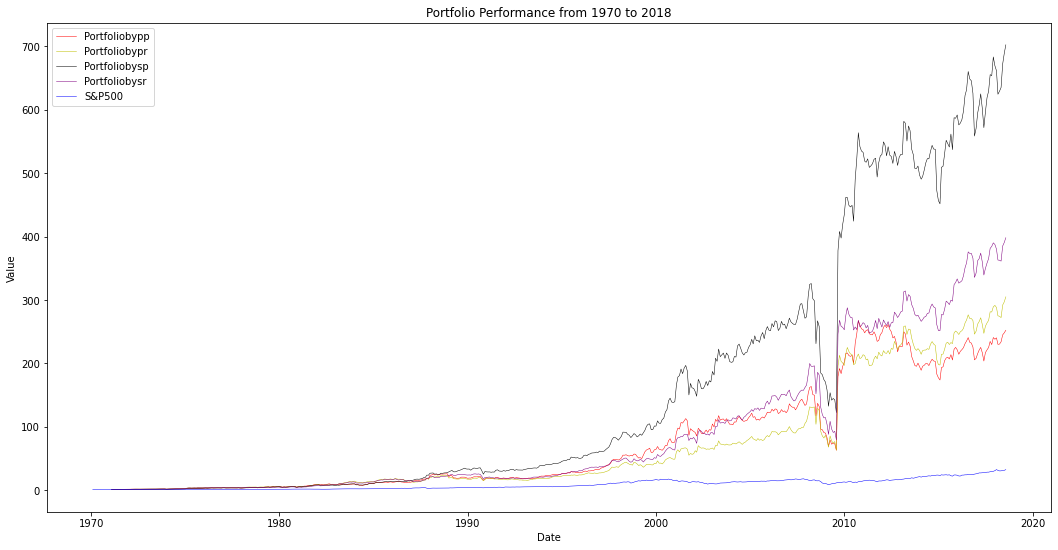

In [43]:
plt.figure(figsize=(18,9))
plt.plot(total_respp['value'],color = 'r',linewidth = 0.5,label='Portfoliobypp')
plt.plot(total_respr['value'],color = 'y',linewidth = 0.5,label='Portfoliobypr')
plt.plot(total_ressp['value'],color = 'black',linewidth = 0.5,label='Portfoliobysp')
plt.plot(total_ressr['value'],color = 'purple',linewidth = 0.5,label='Portfoliobysr')
plt.plot(SPY.loc[:'2018-07-31','value'],color = 'b',linewidth = 0.5,label='S&P500')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 1970 to 2018')

In [44]:
res2000pp = total_respp.loc['2000':,'cumret']
res2000pp = pd.DataFrame(res2000pp)
res2000pp['value'] = res2000pp['cumret'].cumprod()

res2000pr = total_respr.loc['2000':,'cumret']
res2000pr = pd.DataFrame(res2000pr)
res2000pr['value'] = res2000pr['cumret'].cumprod()

res2000sp = total_ressp.loc['2000':,'cumret']
res2000sp = pd.DataFrame(res2000sp)
res2000sp['value'] = res2000sp['cumret'].cumprod()

res2000sr = total_ressr.loc['2000':,'cumret']
res2000sr = pd.DataFrame(res2000sr)
res2000sr['value'] = res2000sr['cumret'].cumprod()

In [45]:
SPY2000 = SPY.loc['2000':'2018-07-31','Return']
SPY2000 = pd.DataFrame(SPY2000)
SPY2000['value'] = (SPY2000['Return']+1).cumprod()

Text(0.5, 1.0, 'Portfolio Performance from 2000 to 2018')

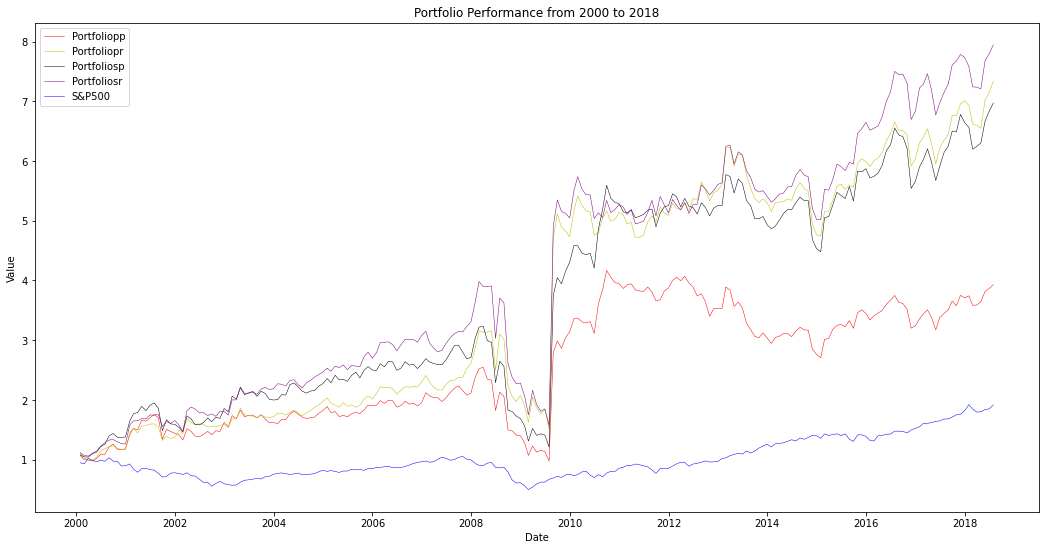

In [46]:
plt.figure(figsize=(18,9))
plt.plot(res2000pp['value'],color = 'r',linewidth = 0.5,label='Portfoliopp')
plt.plot(res2000pr['value'],color = 'y',linewidth = 0.5,label='Portfoliopr')
plt.plot(res2000sp['value'],color = 'black',linewidth = 0.5,label='Portfoliosp')
plt.plot(res2000sr['value'],color = 'purple',linewidth = 0.5,label='Portfoliosr')
plt.plot(SPY2000['value'],color = 'b',linewidth = 0.5,label='S&P500')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 2000 to 2018')

Text(0.5, 1.0, 'Portfolio Performance from 1970 to 2000')

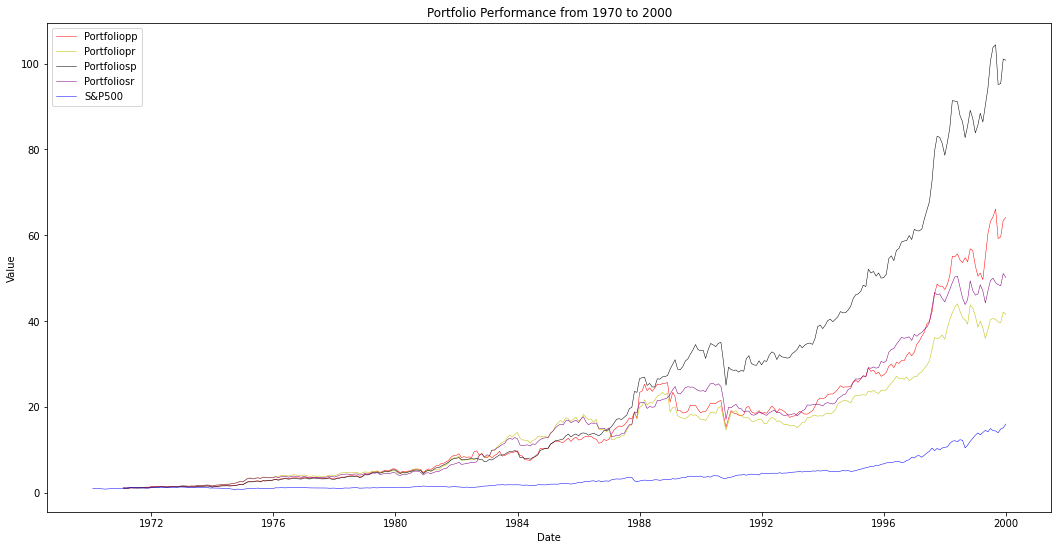

In [47]:
res_pre2000pp = total_respp.loc[:'1999','cumret']
res_pre2000pp = pd.DataFrame(res_pre2000pp)
res_pre2000pp['value'] = res_pre2000pp['cumret'].cumprod()

res_pre2000pr = total_respr.loc[:'1999','cumret']
res_pre2000pr = pd.DataFrame(res_pre2000pr)
res_pre2000pr['value'] = res_pre2000pr['cumret'].cumprod()

res_pre2000sp = total_ressp.loc[:'1999','cumret']
res_pre2000sp = pd.DataFrame(res_pre2000sp)
res_pre2000sp['value'] = res_pre2000sp['cumret'].cumprod()

res_pre2000sr = total_ressr.loc[:'1999','cumret']
res_pre2000sr = pd.DataFrame(res_pre2000sr)
res_pre2000sr['value'] = res_pre2000sr['cumret'].cumprod()

SPY_pre2000 = SPY.loc[:'1999','Return']
SPY_pre2000 = pd.DataFrame(SPY_pre2000)
SPY_pre2000['value'] = (SPY_pre2000['Return']+1).cumprod()

plt.figure(figsize=(18,9))
plt.plot(res_pre2000pp['value'],color = 'r',linewidth = 0.5,label='Portfoliopp')
plt.plot(res_pre2000pr['value'],color = 'y',linewidth = 0.5,label='Portfoliopr')
plt.plot(res_pre2000sp['value'],color = 'black',linewidth = 0.5,label='Portfoliosp')
plt.plot(res_pre2000sr['value'],color = 'purple',linewidth = 0.5,label='Portfoliosr')
plt.plot(SPY_pre2000['value'],color = 'b',linewidth = 0.5,label='S&P500')
plt.legend()
plt.ylabel('Value')
plt.xlabel('Date')
plt.title('Portfolio Performance from 1970 to 2000')

### Calculate the statistical results.

In [48]:
statspp = total_respp['act_ret'].describe()
statspp.loc['Sharpe'] = statspp.loc['mean'] / statspp.loc['std'] * np.sqrt(12)

statspr = total_respr['act_ret'].describe()
statspr.loc['Sharpe'] = statspr.loc['mean'] / statspr.loc['std'] * np.sqrt(12)

statssp = total_ressp['act_ret'].describe()
statssp.loc['Sharpe'] = statssp.loc['mean'] / statssp.loc['std'] * np.sqrt(12)

statssr = total_ressr['act_ret'].describe()
statssr.loc['Sharpe'] = statssr.loc['mean'] / statssr.loc['std'] * np.sqrt(12)

Sharpe = [statspp.loc['Sharpe'],statspr.loc['Sharpe'],statssp.loc['Sharpe'],statssr.loc['Sharpe']]
Sharpe = pd.DataFrame(Sharpe,columns=['Sharpe ratio'],index=['pp','pr','sp','sr'])
Sharpe

,Sharpe ratio
pp,0.322438
pr,0.314913
sp,0.367626
sr,0.330734


In [49]:
stats1pp = (total_respp['act_ret']+total_respp['rf']).describe()
stats1pr = (total_respr['act_ret']+total_respr['rf']).describe()
stats1sp = (total_ressp['act_ret']+total_ressp['rf']).describe()
stats1sr = (total_ressr['act_ret']+total_ressr['rf']).describe()

stats1 = pd.DataFrame(columns=['Annualized mean','Annualized volatility'],index=['pp','pr','sp','sr'])
stats1.loc['pp','Annualized mean'] = stats1pp.loc['mean']*12
stats1.loc['pp','Annualized volatility'] = stats1pp.loc['std']*np.sqrt(12)
stats1.loc['pr','Annualized mean'] = stats1pr.loc['mean']*12
stats1.loc['pr','Annualized volatility'] = stats1pr.loc['std']*np.sqrt(12)
stats1.loc['sp','Annualized mean'] = stats1sp.loc['mean']*12
stats1.loc['sp','Annualized volatility'] = stats1sp.loc['std']*np.sqrt(12)
stats1.loc['sr','Annualized mean'] = stats1sr.loc['mean']*12
stats1.loc['sr','Annualized volatility'] = stats1sr.loc['std']*np.sqrt(12)
stats1

,Annualized mean,Annualized volatility
pp,0.151874,0.328941
pr,0.157962,0.355938
sp,0.174065,0.348769
sr,0.162302,0.352014


In [50]:
Drawdownpp = []
for i in range(len(total_respp['value'])):
    if total_respp['value'].iloc[i]/np.max(total_respp['value'].iloc[0:i+1])-1<0:
        Drawdownpp.append(total_respp['value'].iloc[i]/max(total_respp['value'].iloc[0:i+1])-1)
    else:
        Drawdownpp.append(0)
Drawdownpp = pd.DataFrame(Drawdownpp,index=total_respp.index,columns=['DrawDownpp'])
MaxDDPeriodpp = Drawdownpp.loc[Drawdownpp['DrawDownpp']==Drawdownpp['DrawDownpp'].min()]

Drawdownpr = []
for i in range(len(total_respr['value'])):
    if total_respr['value'].iloc[i]/np.max(total_respr['value'].iloc[0:i+1])-1<0:
        Drawdownpr.append(total_respr['value'].iloc[i]/max(total_respr['value'].iloc[0:i+1])-1)
    else:
        Drawdownpr.append(0)
Drawdownpr = pd.DataFrame(Drawdownpr,index=total_respr.index,columns=['DrawDownpr'])
MaxDDPeriodpr = Drawdownpr.loc[Drawdownpr['DrawDownpr']==Drawdownpr['DrawDownpr'].min()]

Drawdownsp = []
for i in range(len(total_ressp['value'])):
    if total_ressp['value'].iloc[i]/np.max(total_ressp['value'].iloc[0:i+1])-1<0:
        Drawdownsp.append(total_ressp['value'].iloc[i]/max(total_ressp['value'].iloc[0:i+1])-1)
    else:
        Drawdownsp.append(0)
Drawdownsp = pd.DataFrame(Drawdownsp,index=total_ressp.index,columns=['DrawDownsp'])
MaxDDPeriodsp = Drawdownsp.loc[Drawdownsp['DrawDownsp']==Drawdownsp['DrawDownsp'].min()]

Drawdownsr = []
for i in range(len(total_ressr['value'])):
    if total_ressr['value'].iloc[i]/np.max(total_ressr['value'].iloc[0:i+1])-1<0:
        Drawdownsr.append(total_ressr['value'].iloc[i]/max(total_ressr['value'].iloc[0:i+1])-1)
    else:
        Drawdownsr.append(0)
Drawdownsr = pd.DataFrame(Drawdownsr,index=total_ressr.index,columns=['DrawDownsr'])
MaxDDPeriodsr = Drawdownsr.loc[Drawdownsr['DrawDownsr']==Drawdownsr['DrawDownsr'].min()]

MaxDD = pd.concat([MaxDDPeriodpp,MaxDDPeriodpr,MaxDDPeriodsp,MaxDDPeriodsr],axis=1)

In [51]:
MaxDD

,DrawDownpp,DrawDownpr,DrawDownsp,DrawDownsr
date,,,,
2009-07-31,-0.615997,-0.521677,-0.624989,-0.603638
